In [1]:
%load_ext autoreload 
%autoreload 2

import torch
import matplotlib.pyplot as plt
from fusanet_utils.datasets.simulated import SimulatedPoliphonic
from fusanet_utils.datasets.fusa import FUSA_dataset
from torch.utils.data import ConcatDataset
import yaml
import json

categories = json.load(open('/home/phuijse/Downloads/index_to_name.json'))
model = torch.load('/home/phuijse/Downloads/model.pt')
dataset = SimulatedPoliphonic('..', external=True, mini=False, categories = (categories.values()))
params = yaml.safe_load(open('../experiments/Poliphonic-PANN-sed-no-pretrained/params.yaml'))
fusa_dataset = FUSA_dataset(ConcatDataset([dataset]), feature_params=params["features"])

len(dataset.categories)

33

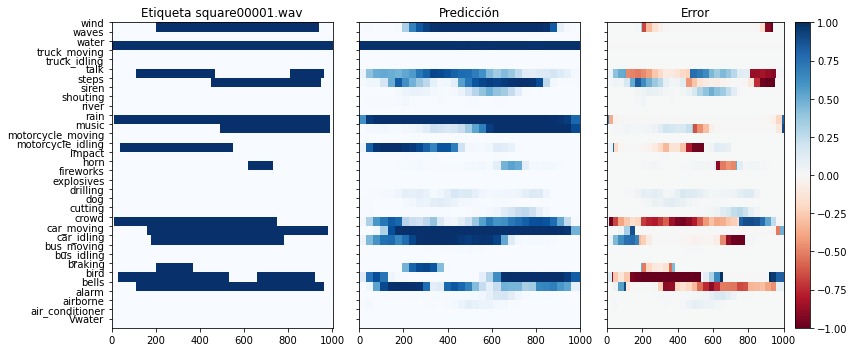

In [2]:
def plot_file_prediction(file_idx: int):
    pred = model.forward(fusa_dataset[file_idx])[0].T.detach().numpy()
    label = fusa_dataset[file_idx]['label'].T.numpy()
    fig, ax = plt.subplots(1, 3, figsize=(12, 5), tight_layout=True, sharex=True, sharey=True)
    ax[0].pcolormesh(label, cmap=plt.cm.Blues, vmin=0, vmax=1)
    ax[0].set_title(f"Etiqueta {fusa_dataset[file_idx]['filename']}")
    ax[1].pcolormesh(pred, cmap=plt.cm.Blues, vmin=0, vmax=1)
    ax[1].set_title('Predicción')
    cmap = ax[2].pcolormesh((pred - label), cmap=plt.cm.RdBu, vmin=-1, vmax=1)
    fig.colorbar(cmap)
    ax[2].set_title('Error')
    ax[0].set_yticks(range(1, len(categories.values())+1))
    ax[0].set_yticklabels((categories.values()));
    
plot_file_prediction(0)